# Types of Data

### categorical: categories or groups like car brands,  yes or no questions

### numerical: 
#### -discrete: number of children a couple has (certainty thta it will be an int), sat results (certainty that it will be within a range)
#### -continuous: the weight of a person (continuous no matter how many decimal points), height, area, distance, time, they can vary infinitely 

# Measurement levels:

### Qualitative: 
#### -Nominal: brands of cars, seasons, not numbers and can't be ordered
#### -Ordinal: still a category but in a particualr order, for example, tastiness of food (disgusting to delicious)

### Quantitative:
#### -Interval: do not have a true zero (temperature), kelvin are a temperature exception it has a true 0 and is a ratio
#### -ratio: have a true zero (number of objects, distance, time)

# Regression Analysis
### common approach to when there is a cause and effect relationship between variables
### can be complemented with factor analysis
### common supervised machine learning approach

# Linear Regression

### A linear regression is a linear approximation of a causal relationship between 2 or more variables

### most common way to make inferences and predictions
### get sample data -> design a model that works for that sample -> make predictions for the whole population

### Y is the dependent variable or what is going to be predicted
### x is the independent variable and they are the predictors
### the dependent variable y is a function of the independent variables, the regression model is a linear approximation of this function


### yhat = b0 + b1x1
### yha means it is an estimated or predicted value
### b0 is the constant
### b1 qunatifies the effect of the independent variable on the dependent variable
### x1 is the sample data for the independent variable

# Correlation vs Regression

### correlation does not mean causation
### correlation checks for the relatioship between 2 variables while regression tests for the way a variable affects an other
### correlation does not capture causality but just the degree of movement togehter, regression does test for cause and effect
### correlation between x and y is the same as y and x and this is not what is observed in regression, regression is a one way prediction 
### these methods have very different plot representations, correlation is a single point while regression is a line 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

In [3]:
housing_prices = pd.read_csv("ex1data2.txt",dtype=np.float64, header=None)
housing_prices.columns = ['square_feet', 'bedrooms', 'price']
housing_prices.head()

,square_feet,bedrooms,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0


In [4]:
#getting summary statistics of the data 
housing_prices.describe()

,square_feet,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [5]:
#checking for missing values in the dataframe
housing_prices.isnull().values.any()

False

In [6]:
#define dependent and independent variable
y = housing_prices['price']
x1 = housing_prices['square_feet']


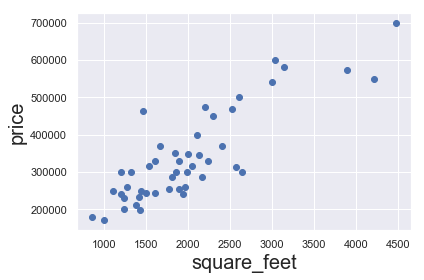

In [7]:
#data exploration
plt.scatter(x1,y)
plt.xlabel('square_feet', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

In [8]:
#variable for b0
x = sm.add_constant(x1)

#variable for ordinary least squares regression
#fit will apply a specific estimation technique (ols in this case) to fit the model
result = sm.OLS(y, x).fit()

#get the summary for the regression
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.03e-14
Time:                        02:46:09   Log-Likelihood:                -586.94
No. Observations:                  47   AIC:                             1178.
Df Residuals:                      45   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.127e+04   2.61e+04      2.725      0.009    1.86e+04    1.24e+05
square_feet   134.5253     12.165     11.058      0.000     110.024     159.027
==============================================================================
Omnibus:                        3.751   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.726
Skew:                           0.557   Prob(JB):                        0.256
Kurtosis:                       3.390   Cond. No.                     5.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The tables we see here are:
#### The model summary
#### The coeficient table
#### And aditional tests

### the lowest the standard error the bestter is our estimate
### t statistics and P>|t|, a P value under 0.05 means that this variable is significant. having the value of 0 for square_feet means that it is a very significant variable to predict housing price

### OLS or minimum squares error (min sse) lowest error has the best explanatory power

### R squared: r^2 = ssr/sst, so it is equal to the variability explained by the regression divided by the total variability, when 0 the regression explains none of the variability, when it is 1 the regression explains the entirety of the variability, a good r^2 has no definite answer, for instance physics likes values near 0.7, social sciences are ok with 0.2

### In this case the r^2 is 0.731, which means the area of the houses explains over 70% of the target price

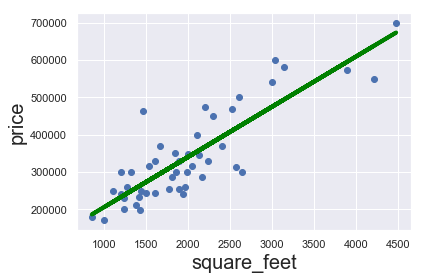

In [9]:
#plotting the regression line
plt.scatter(x1, y)

#the actual regression line
yhat = 134.5253*x1 + 71270
fig = plt.plot(x1,yhat, lw = 4, c = 'green', label = 'regression line')
plt.xlabel('square_feet', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

### Decomposition of variability
#### sum of squares total - sst, sum of the squares of the difference between an observed dependent variable and its mean, it is the dispersion of the observed variables around the mean. I measures total variability of the dataset, also called total sum of squares
#### sum of squares regression - ssr, it is the sum of the differences between the predicted value and its mean, it measures how well our line fits the data, measures the explained variability by your line, also called ess, explained sum of squares
#### sum of squares error - sse, measures the difference between the observed value and the predicted value, it measures the unexplaned variability by the regression, also called residual sum of squares

### what is the connection between these?
### sst = ssr + sse
### the total variability of the data set is equal to the explained variability plus the unexplained variability 

# Multiple Linear Regression

### After 3 dimensions there is no visual way to represent the data, it becomes about the best fitting model instead of the line
### We look for the least sum of errors or min SSE
### with each aditional variable we increase the explanatory power and a better fitting model

## Adjusted r^2
### so the r^2 measures how much of the total variability is explained by our model and multiple regressions are usually better than simple ones as wih each additional variable you add the explanatory power may only increase or stay the same

### the adjusted r^2 penalizes the excessive use of variables

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

In [11]:
housing_prices = pd.read_csv("ex1data2.txt",dtype=np.float64, header=None)
housing_prices.columns = ['square_feet', 'bedrooms', 'price']
housing_prices.head()

,square_feet,bedrooms,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0


In [12]:
#define dependent and independent variable
y = housing_prices['price']
x1 = housing_prices[['square_feet', 'bedrooms']]


In [13]:
#variable for b0
x = sm.add_constant(x1)

#variable for ordinary least squares regression
#fit will apply a specific estimation technique (ols in this case) to fit the model
result = sm.OLS(y, x).fit()

#get the summary for the regression
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.43e-13
Time:                        02:46:26   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         8.96e+04   4.18e+04      2.145      0.037    5421.208    1.74e+05
square_feet   139.2107     14.795      9.409      0.000     109.393     169.028
bedrooms    -8738.0191   1.55e+04     -0.566      0.575   -3.99e+04    2.24e+04
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.977
Skew:                           0.567   Prob(JB):                        0.226
Kurtosis:                       3.484   Cond. No.                     9.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The new r^2 is just a little bit higher than in the previous case which means that the square footage of the house has more power in predicting the price of the house than the number of bedrooms

### The adjusted r^2 is actually smaller when using the 2 independent variables, we added information but we lost value

### the p value for the bedrooms is also high which means that this variable worses the explanatory value and is not significant, it should be dropped

### the bias of a bad variable is reflected in the coeficients of the others

### simplicity is better rewarded than higher explanatory power

### On the F statistics: F statistics follows an F distribution, it is used to test the overal significance of a model, the null hypothesis is that all the betas are equal to 0, with the alternative hypothesis being that at least one beta differs from 0
### If all the betas are zero then none of the xs matter so the model has no merit
### for the case of the simple linear regression the F-statistic was 122 and for the multiple linear regression the F-statistic is half of that, both the p values for them are very low,  these are both signs that the models are significant but the first one more than the second

## Regression Assumptions
### Linearity
### No endogeneity: omitted variable bias happens when we forget to include a relevant variable, whatever we forget to include ends up correlating with the error , example housing price being higher for smaller apartments can be explained if we accidentally omit location (smaller apts are more common in sky scrapers which are newer prime locations)
### Normality and homoscedasticity (constant variance): we assume the error term is normally distributed, if not normal we use the central limit theorem, a 0 mean then a line is not the best fit, and intercept solves this problem, in a heterodedastic model we will see that the samples closer to the start of the regression line cluster but start spanning farther away as we move so the error increases,  for example the higher the income the more diverse is their type of expenses-> high variability, to circumvent this we look at outliers, log transformation and omitted variables 
### No autocorrelations (the covariance of any 2 error terms is 0): day of the week effect- high returns on friday and low returns on mondays, miller  proposed that this was due to the weekend time to read news, to detect autocorrelation one can plot all the residual errors and see if there is a pattern or to use the durbin-watson test ( 2 means no autocorrelation, less than 1 or greater than 3 are a cause for alarm, there is no real solution for autocorrelation, just use a different model.
### No multicollinearity (when 2 or more variables are are highly correlate): if 2 variables correlate there is no real point of using both of the variables as they will have the same effect 


In [14]:
#example of a log transformation
housing_prices['log_x'] = np.log(housing_prices['square_feet'])
housing_prices['log_y'] = np.log(housing_prices['price'])

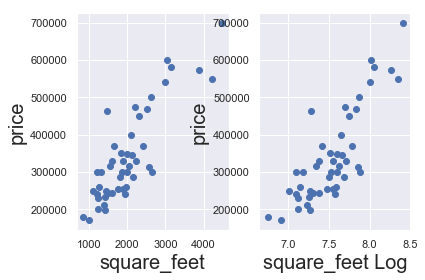

In [15]:
plt.subplot(1,2,1)
plt.scatter(housing_prices['square_feet'], housing_prices['price'])
plt.xlabel('square_feet', fontsize = 20)
plt.ylabel('price', fontsize = 20)

#tranforming the x scale
plt.subplot(1,2,2)
plt.scatter(housing_prices['log_x'], housing_prices['price'])
plt.xlabel('square_feet Log', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

### we can see that the graph contracted with the log transformation and the points became closer to eachother from left to right

### this is a case for a semi-log model

## Dummy variables

### they are used to include categorical data into a regression model

In [29]:
gpa = pd.read_csv("xAPI-Edu-Data.csv")
gpa.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### StudentAbsenceDays is a categorical variable so in this format it can't be used in the regression, let's use dummies
### if student attended more than 70% of the class it will be 1, if not it will be 0

In [30]:
gpa['StudentAbsenceDays'] = gpa.StudentAbsenceDays.map({'Under-7':1, 'Above-7':0})

In [33]:
gpa.head(25)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,1,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,1,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,0,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,0,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,0,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,0,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,0,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,1,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,1,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,1,M


In [32]:
gpa.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,0.602083
std,30.779223,33.080007,26.611244,27.637735,0.489979
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,15.750000,20.000000,14.000000,20.000000,0.000000
50%,50.000000,65.000000,33.000000,39.000000,1.000000
75%,75.000000,84.000000,58.000000,70.000000,1.000000
max,100.000000,99.000000,98.000000,99.000000,1.000000


### According to the data 60% of the students had under 7 missed classes

# Regression that accounts for raised hands and absences

In [42]:
y = gpa['VisITedResources']

x1 = gpa[['raisedhands','StudentAbsenceDays']]

In [43]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       VisITedResources   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     257.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.77e-76
Time:                        04:00:39   Log-Likelihood:                -2184.6
No. Observations:                 480   AIC:                             4375.
Df Residuals:                     477   BIC:                             4388.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 16.0965      2.009      8.011      0.000      12.148      20.045
raisedhands            0.6301      0.039     16.350      0.000       0.554       0.706
StudentAbsenceDays    15.3315      2.421      6.334      0.000      10.575      20.088
==============================================================================
Omnibus:                        7.096   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.192
Skew:                           0.242   Prob(JB):                       0.0274
Kurtosis:                       3.355   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## based on the high f statisttic and p value students that skip class less and that raise their hands more also tend to use more class resources

## the adjusted r^2 is over 0.5 wich is a pretty good value

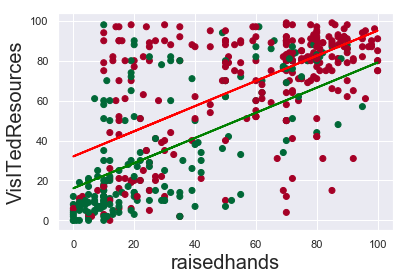

In [46]:
#the equation in case the student did not attend the most is 
#yhat_Above_7 = const_coef + raisedhands_coef*gpa['raisedhands'] + gpa['StudentAbsenceDays']*dummy
#with dummy being 0 if above 7 and 1 if under 7

plt.scatter(gpa['raisedhands'], y, c = gpa['StudentAbsenceDays'], cmap = 'RdYlGn_r')

yhat_Above_7 = 16.0965 + 0.6301*gpa['raisedhands']
yhat_Under_7 = 16.7266 + 0.6301*gpa['raisedhands'] + 15.3315

fig = plt.plot(gpa['raisedhands'], yhat_Above_7, lw = 2, c = 'green')
fig = plt.plot(gpa['raisedhands'], yhat_Under_7, lw = 2, c = 'red')

plt.xlabel('raisedhands', fontsize = 20)
plt.ylabel('VisITedResources', fontsize = 20)
plt.show()

## The marks in red represent students that had attendance with missing less than 7 classes, the marks in green are students that skipped more than 7 classes

## There is a StatsModels method which takes a data frame organized in the same way as x and then makes predictions



In [47]:
x

,const,raisedhands,StudentAbsenceDays
0,1.0,15,1
1,1.0,20,1
2,1.0,10,0
3,1.0,30,0
4,1.0,40,0
5,1.0,42,0
6,1.0,35,0
7,1.0,50,1
8,1.0,12,1
9,1.0,70,1


In [56]:
#creating a data frame to use for predictions,  predict 
new_data = pd.DataFrame({'const':1, 'raisedhands':[60, 60], 'StudentAbsenceDays':[0,1]})

#usually the data frames are reordered alphabetically but in this case the order will be the same so no need to impose it
new_data

,const,raisedhands,StudentAbsenceDays
0,1,60,0
1,1,60,1


In [57]:
#I will give a name to these random students
new_data.rename(index={0:'Bob', 1:'Alice'})

,const,raisedhands,StudentAbsenceDays
Bob,1,60,0
Alice,1,60,1


In [58]:
predictions = result.predict(new_data)
predictions

0    53.899523
1    69.230983
dtype: float64

In [59]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob', 1:'Alice'})

,const,raisedhands,StudentAbsenceDays,Predictions
Bob,1,60,0,53.899523
Alice,1,60,1,69.230983


## So it is predicted that bob having more missed classes will use less class resources than Alice despite raising his hands as many times as alice did